# Exploratory Data Analysis on "cases_train.csv"



In [1]:
import numpy as np 
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('../data/cases_train.csv')
df.head()


age     sex           province  country   latitude  longitude  \
0    NaN     NaN              Delhi    India  28.614740  77.209100   
1    NaN     NaN      Uttar Pradesh    India  25.436090  81.847180   
2    NaN     NaN        Maharashtra    India  18.504220  73.853020   
3  15-34  female  Baden-Wurttemberg  Germany  48.120860   7.849500   
4    NaN     NaN            Gujarat    India  23.188409  73.647122   

  date_confirmation additional_information  \
0        26.05.2020                    NaN   
1        20.05.2020                    NaN   
2        26.05.2020                    NaN   
3        15.03.2020                    NaN   
4        20.05.2020                    NaN   

                                              source          outcome  
0  https://twitter.com/CMODelhi/status/1265203060...        recovered  
1                       https://t.me/indiacovid/5222     hospitalized  
2                       https://t.me/indiacovid/5601     hospitalized  
3                                                NaN  nonhospitalized  
4  https://twitter.com/PIBAhmedabad/status/126311...     hospitalized

In [2]:
Area = (df.longitude.min(),   df.longitude.max(),      
         df.latitude.min(), df.latitude.max())

print(Area)

(-159.72759647299998, 174.74, -54.80802999999997, 70.0718)


### Location that have Covid Cases on Training Dataset - longitude & latitude

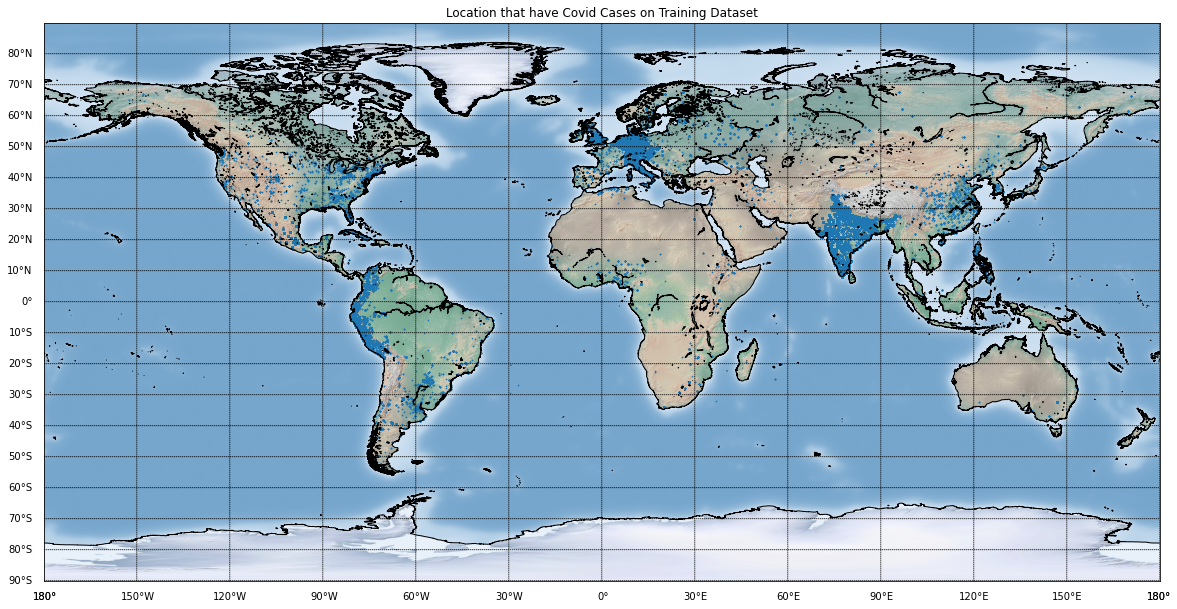

In [3]:
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(20,20))
m = Basemap(projection='cyl',
 llcrnrlat = -90,
 urcrnrlat = 90,
 llcrnrlon = -180,
 urcrnrlon = 180,
 resolution = 'h')
m.shadedrelief()

m.drawcoastlines()
m.drawparallels(np.arange(-90,90,10),labels=[True,False,False,False])
m.drawmeridians(np.arange(-180,180,30),labels=[0,0,0,1])
m.scatter(df.longitude,df.latitude,latlon=True,s=0.5)
plt.title('Location that have Covid Cases on Training Dataset')
plt.show()

This map helped demonstrate where the majority of our dataset is located, such as the clusters in India and Europe. It also shows that our data is clustered, opposed to being evenly distributed, and that regions such as Africa and Oceania have very little representation. It also helped identify possible outliers, as it seems there are some cases in the ocean.

### Distribution of the attributes

Text(0.5, 1.0, 'Distribution of the longitude ')

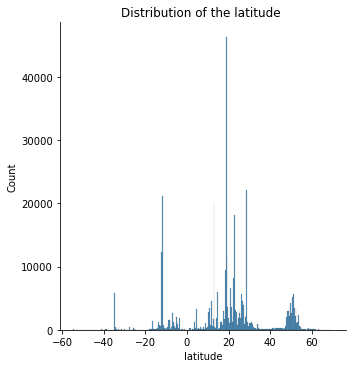

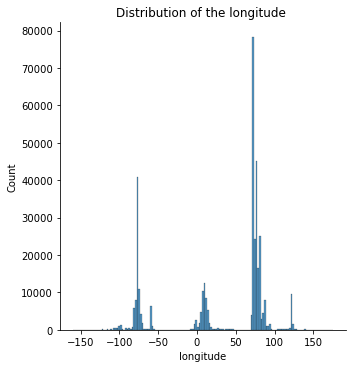

In [4]:
import seaborn as sns
dlg=sns.displot(df['latitude'],kde=False)
plt.title('Distribution of the latitude ')

sns.displot(df['longitude'],kde=False)
plt.title('Distribution of the longitude ')

Text(0.5, 1.0, 'Covid-19 Cases in Gender')

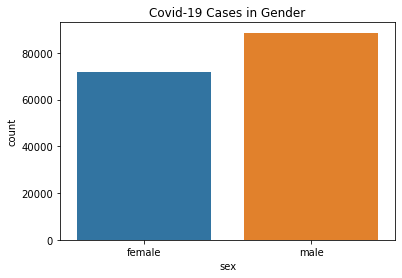

In [5]:
sns.countplot(data = df, x='sex')
plt.title('Covid-19 Cases in Gender')

Text(0.5, 1.0, 'The Outcome form Covid-19 Cases')

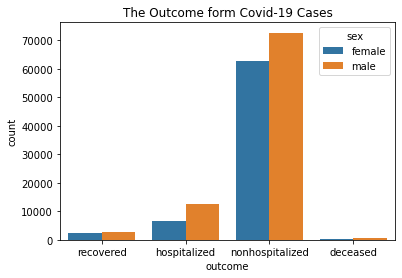

In [6]:
sns.countplot(data = df, x='outcome',hue='sex')
plt.title('The Outcome form Covid-19 Cases')

Most of the covid cases are non-hospitalized, and the vast majority of our dataset does not contain cases that resulted in death. It is interesting to note the relative gender parity in recovered and deceased however, when compared to our data for hospitalized and nonhospitalized.

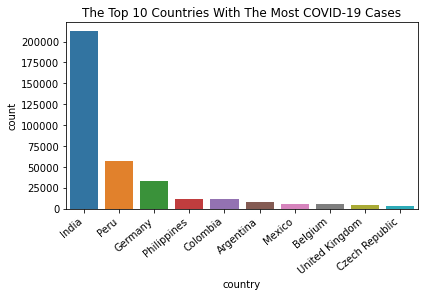

In [7]:
ax = sns.countplot(data = df, x='country', order=df.country.value_counts().iloc[:10].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title('The Top 10 Countries With The Most COVID-19 Cases')
plt.show()

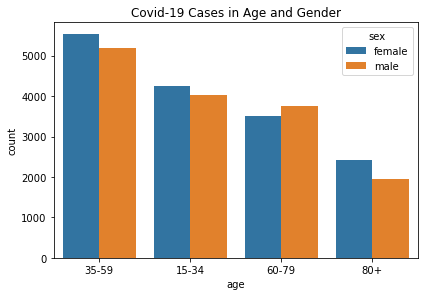

In [8]:
ax = sns.countplot(data = df, x='age', hue='sex',order=df.age.value_counts().iloc[:4].index)
ax.set_xticklabels(ax.get_xticklabels())
plt.tight_layout()
plt.title('Covid-19 Cases in Age and Gender')
plt.show()

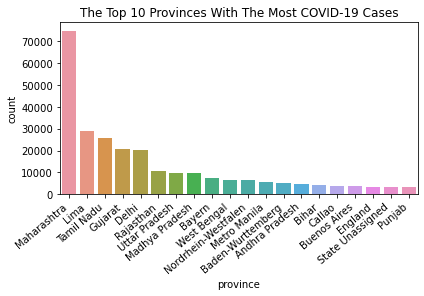

In [9]:
ax = sns.countplot(data = df, x='province', order=df.province.value_counts().iloc[:20].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title('The Top 10 Provinces With The Most COVID-19 Cases')
plt.show()

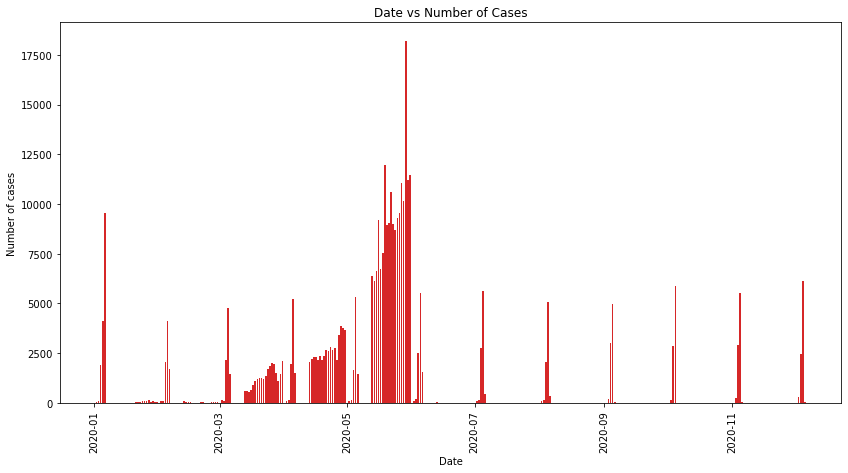

In [10]:
color = sns.color_palette()
df['date_confirmation'] = df['date_confirmation'].fillna('')
df.loc[df['date_confirmation'].str.contains("-"),'date_confirmation'] = np.nan
df['date_confirmation'] = pd.to_datetime(df["date_confirmation"])
df["date"] = df["date_confirmation"].dt.date
count = df["date"].value_counts()
plt.figure(figsize=(14,7))
axis = plt.subplot(111)
axis.bar(count.index, count.values, color=color[3])
axis.xaxis_date()
plt.xticks(rotation='vertical')
plt.title('Date vs Number of Cases')
plt.ylabel("Number of cases")
plt.xlabel("Date")
plt.show()

The histogram plotting the date of confirmation of the cases seems relatively mundane. It also seems our data is consistent in terms of the count at province and country level. Ratio between female and male seems very within range too, so our data doesn't appear to be skewed in that aspect either. Although, it is interesting to note that we have a lot more data on cases of younger people than older people, especially under 80 compared to above 80.

### Countries against the 4 categories of outcome: hospitalized, recovered, nonhospitalized, and deceased

Text(0.5, 1.0, 'Hospitalized vs Countries')

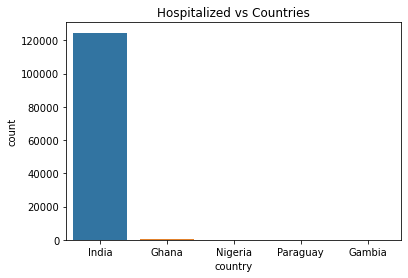

In [11]:
hos=df.loc[df.outcome=='hospitalized']
sns.countplot(data = hos, x='country', order=hos.country.value_counts().iloc[:5].index)
plt.title('Hospitalized vs Countries')

Text(0.5, 1.0, 'Recovered vs Countries')

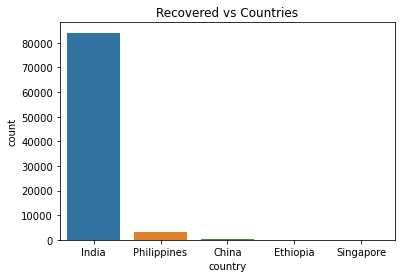

In [12]:
hos=df.loc[df.outcome=='recovered']
sns.countplot(data = hos, x='country', order=hos.country.value_counts().iloc[:5].index)
plt.title('Recovered vs Countries')

Text(0.5, 1.0, 'Non-hospitalized vs Countries')

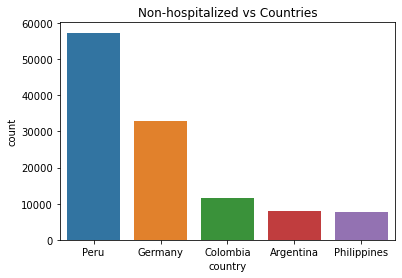

In [13]:
hos=df.loc[df.outcome=='nonhospitalized']
sns.countplot(data = hos, x='country', order=hos.country.value_counts().iloc[:5].index)
plt.title('Non-hospitalized vs Countries')

Text(0.5, 1.0, 'Deceased vs Countries')

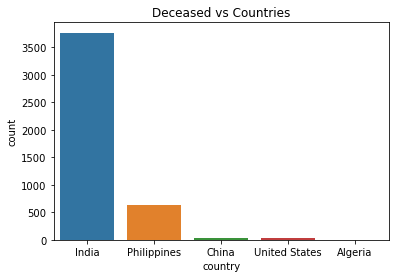

In [14]:
hos=df.loc[df.outcome=='deceased']
sns.countplot(data = hos, x='country', order=hos.country.value_counts().iloc[:5].index)
plt.title('Deceased vs Countries')

The massive spike from India is somewhat expected, after viewing our heatmap of case data, so much is located in India that it makes sense it dominates each histogram. Although, the variations in outcomes vs countries does prompt an inquiry into the relationship between country and fatality rate. Peru is also highly interesting in these chats, prompting further investigation, because Peru does not have as many cases as India but it does have the most non-hospitalized cases.

# Exploratory Data Analysis on "location.csv"

In [15]:
dl=pd.read_csv('../data/location.csv')


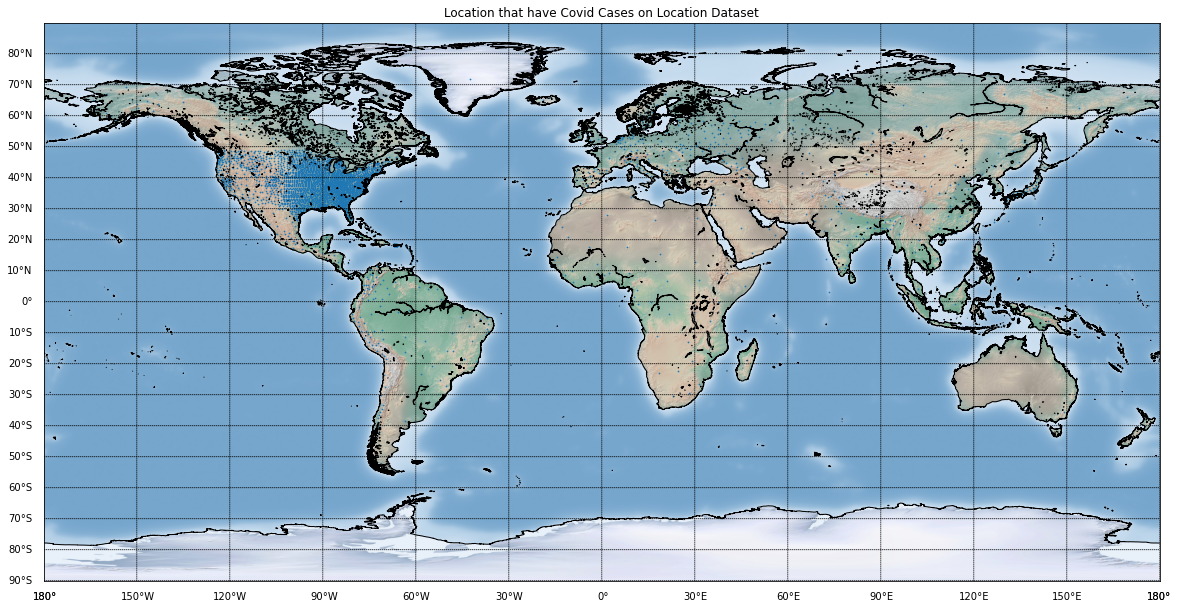

In [16]:
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(20,20))
m = Basemap(projection='cyl',
 llcrnrlat = -90,
 urcrnrlat = 90,
 llcrnrlon = -180,
 urcrnrlon = 180,
 resolution = 'h')
m.shadedrelief()

m.drawcoastlines()
m.drawparallels(np.arange(-90,90,10),labels=[True,False,False,False])
m.drawmeridians(np.arange(-180,180,30),labels=[0,0,0,1])
m.scatter(dl.Long_,dl.Lat,latlon=True,s=0.5)
plt.title('Location that have Covid Cases on Location Dataset')
plt.show()

In the location dataset, most of the cases are located in US. Further inspection of the dataset reveals this to be caused by the US listing each county as a unique row, as opposed to each state under the province label.

### Distribution of the attributes

Text(0.5, 1.0, 'Distribution of the latitude')

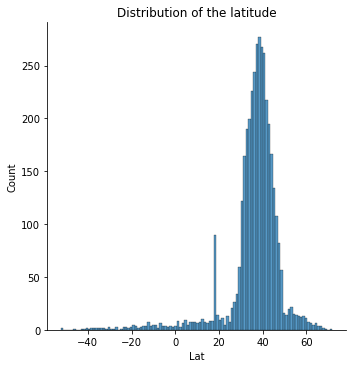

In [19]:
sns.displot(dl['Lat'],kde=False)
plt.title('Distribution of the latitude')

Text(0.5, 1.0, 'Distribution of the longitude ')

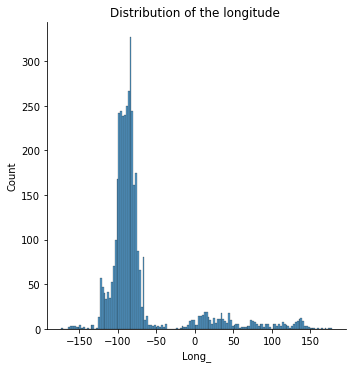

In [20]:
sns.displot(dl['Long_'],kde=False)
plt.title('Distribution of the longitude ')

Text(0.5, 1.0, 'Distribution of the Incidence_Rate')

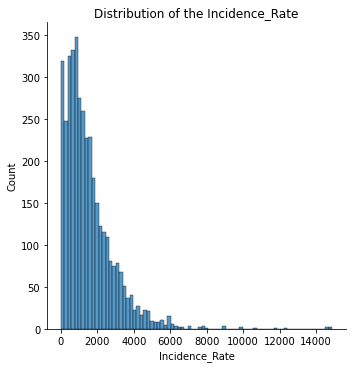

In [21]:
sns.displot(dl['Incidence_Rate'],kde=False)
plt.title('Distribution of the Incidence_Rate')

Text(0.5, 1.0, 'Distribution of the Case-Fatality_Ratio')

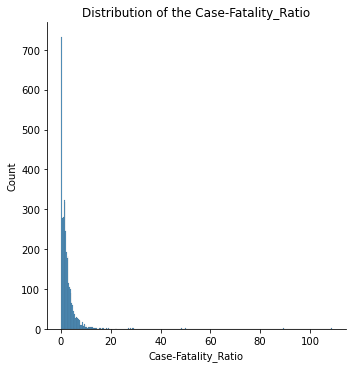

In [22]:
sns.displot(dl['Case-Fatality_Ratio'],kde=False)
plt.title('Distribution of the Case-Fatality_Ratio')

The last two plots give us a feel for how fatal, and how prevalent Covid is amoung the countries in our dataset. Although, not the most enlightening as we see they are highly clustered. 

### Country Regions and Province States With the Highest Incidence Rate and Case-Fatality_Ratio

For the incidence Rate and Case-Fatality_Ratio, we want to get more information besides their distribution. Plots are created to see how they are related to country region and province states.

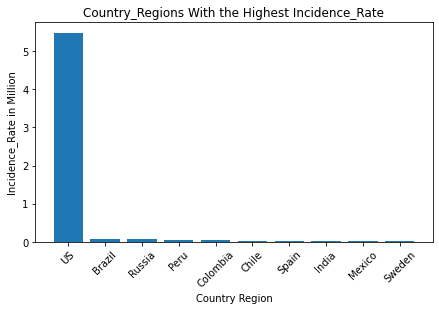

In [23]:
aggregation_functions = {'Incidence_Rate': 'sum','Country_Region':'first'}
df_new = dl.groupby(dl['Country_Region']).aggregate(aggregation_functions).reindex(columns=dl.columns)
df_new.head()
df_new = df_new.sort_values(by=['Incidence_Rate'],ascending=False).iloc[:10]
plt.bar(df_new.Country_Region, df_new.Incidence_Rate/10**6)
plt.xticks(rotation='45')
plt.tight_layout()
plt.title('Country_Regions With the Highest Incidence_Rate')
plt.ylabel("Incidence_Rate in Million")
plt.xlabel("Country Region")
plt.show()

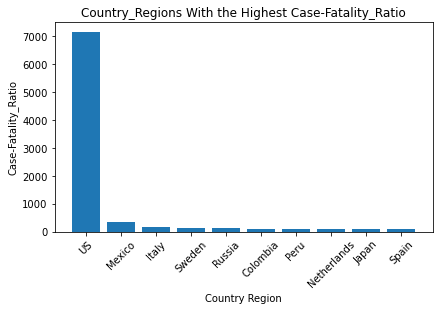

In [24]:
aggregation_functions = {'Case-Fatality_Ratio': 'sum','Country_Region':'first'}
df_new = dl.groupby(dl['Country_Region']).aggregate(aggregation_functions).reindex(columns=dl.columns)
df_new.head()
df_new = df_new.sort_values(by=['Case-Fatality_Ratio'],ascending=False).iloc[:10]
plt.bar(df_new.Country_Region, df_new['Case-Fatality_Ratio'])
plt.xticks(rotation='45')
plt.tight_layout()
plt.title('Country_Regions With the Highest Case-Fatality_Ratio')
plt.ylabel("Case-Fatality_Ratio")
plt.xlabel("Country Region")
plt.show()

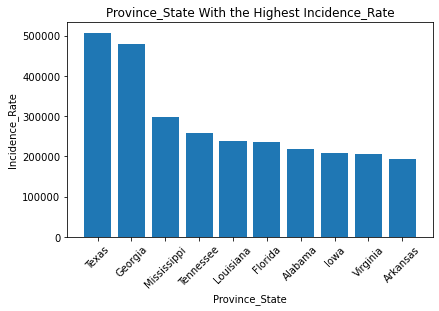

In [25]:
aggregation_functions = {'Incidence_Rate': 'sum','Province_State':'first'}
df_new = dl.groupby(dl['Province_State']).aggregate(aggregation_functions).reindex(columns=dl.columns)
df_new = df_new.sort_values(by=['Incidence_Rate'],ascending=False).iloc[:10]
plt.bar(df_new.Province_State, df_new['Incidence_Rate'])
plt.xticks(rotation='45')
plt.tight_layout()
plt.title('Province_State With the Highest Incidence_Rate')
plt.ylabel("Incidence_Rate")
plt.xlabel("Province_State")
plt.show()

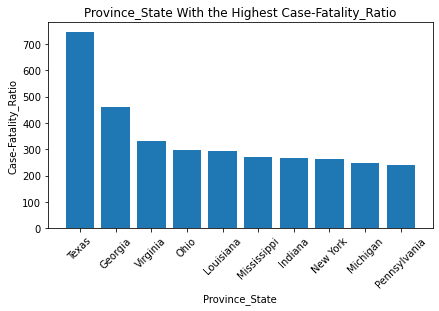

In [26]:
aggregation_functions = {'Case-Fatality_Ratio': 'sum','Province_State':'first'}
df_new = dl.groupby(dl['Province_State']).aggregate(aggregation_functions).reindex(columns=dl.columns)
df_new = df_new.sort_values(by=['Case-Fatality_Ratio'],ascending=False).iloc[:10]
plt.bar(df_new.Province_State, df_new['Case-Fatality_Ratio'])
plt.xticks(rotation='45')
plt.tight_layout()
plt.title('Province_State With the Highest Case-Fatality_Ratio')
plt.ylabel("Case-Fatality_Ratio")
plt.xlabel("Province_State")
plt.show()

### Country_Regions With the highest amount of Confirmed,Death,Recovered and Active

For the confirmed, death, recovered and active labels, we can not get enough information form the distribution plot. Therefore,we created the plot for county against these labels to see which country and province has the most confirmed, death, recovered and active cases.

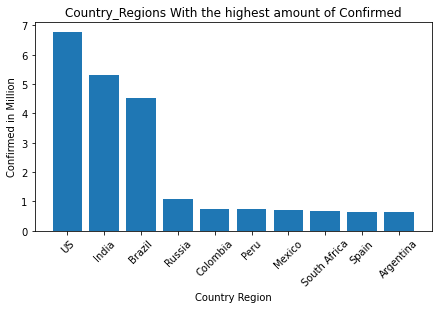

In [27]:
aggregation_functions = {'Confirmed': 'sum','Country_Region':'first'}
df_new = dl.groupby(dl['Country_Region']).aggregate(aggregation_functions).reindex(columns=dl.columns)
df_new.head()
df_new = df_new.sort_values(by=['Confirmed'],ascending=False).iloc[:10]
plt.bar(df_new.Country_Region, df_new.Confirmed/10**6)
#sns.lineplot(data = df_new, x='Country_Region', y='Confirmed')
plt.xticks(rotation='45')
plt.tight_layout()
plt.title('Country_Regions With the highest amount of Confirmed')
plt.ylabel("Confirmed in Million")
plt.xlabel("Country Region")
plt.show()

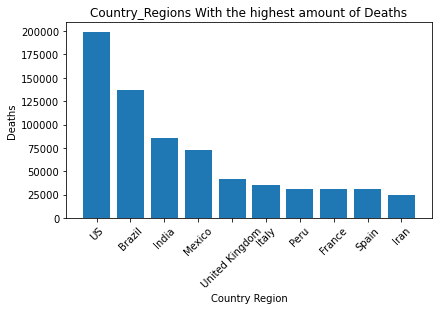

In [28]:
#sns.catplot(data = dl, x='Recovered', y='Country_Region', order=dl.Recovered.value_counts().iloc[:5].index)
aggregation_functions = {'Deaths': 'sum','Country_Region':'first'}
df_new = dl.groupby(dl['Country_Region']).aggregate(aggregation_functions).reindex(columns=dl.columns)
df_new.head()
df_new = df_new.sort_values(by=['Deaths'],ascending=False).iloc[:10]
#plt.plot(df_new.Country_Region, df_new.Deaths)
#sns.lineplot(data = df_new, x='Country_Region', y='Deaths')
plt.bar(df_new.Country_Region, df_new.Deaths)
plt.xticks(rotation='45')
plt.tight_layout()
plt.title('Country_Regions With the highest amount of Deaths')
plt.ylabel("Deaths")
plt.xlabel("Country Region")
plt.show()

#x=df_new.nlargest(5, 'Deaths')
#plt.plot(df_new.Country_Region,x.Deaths)
#plt.show()

#print(x)
#print(dl.Country_Region.value_counts().iloc[:5])

#plt.xticks(x.Country_Region.loc[:5],rotation=40)
#plt.plot(df_new.Country_Region,df_new.Deaths)

#sns.lineplot(data = df_new, x='Country_Region', y='Deaths')


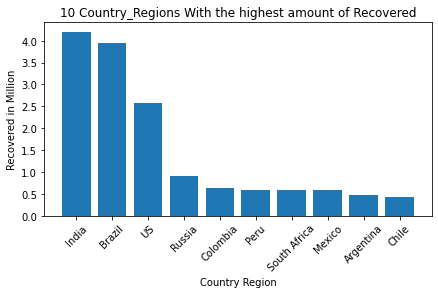

In [29]:
#plt.plot(dl.Country_Region,dl.Recovered/10**6)
aggregation_functions = {'Recovered': 'sum','Country_Region':'first'}
df_new = dl.groupby(dl['Country_Region']).aggregate(aggregation_functions).reindex(columns=dl.columns)
df_new.head()
df_new = df_new.sort_values(by=['Recovered'],ascending=False).iloc[:10]
plt.bar(df_new.Country_Region, df_new.Recovered/10**6)
#sns.lineplot(data = df_new, x='Country_Region', y='Recovered')
plt.title('10 Country_Regions With the highest amount of Recovered')
plt.xticks(rotation='45')
plt.tight_layout()
plt.ylabel("Recovered in Million")
plt.xlabel("Country Region")
plt.show()

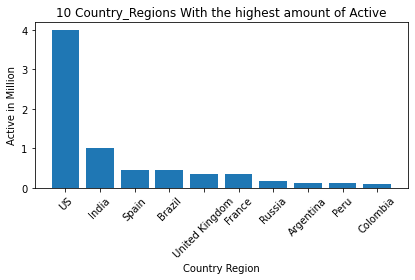

In [30]:
aggregation_functions = {'Active': 'sum','Country_Region':'first'}
df_new = dl.groupby(dl['Country_Region']).aggregate(aggregation_functions).reindex(columns=dl.columns)
df_new.head()
df_new = df_new.sort_values(by=['Active'],ascending=False).iloc[:10]
plt.bar(df_new.Country_Region, df_new.Active/10**6)
#sns.lineplot(data = df_new, x='Country_Region', y='Active')
plt.title('10 Country_Regions With the highest amount of Active')
plt.xticks(rotation='45')
plt.ylabel("Active in Million")
plt.xlabel("Country Region")
plt.tight_layout()
plt.show()

### Province_State With the highest amount of Confirmed,Death,Recovered and Active

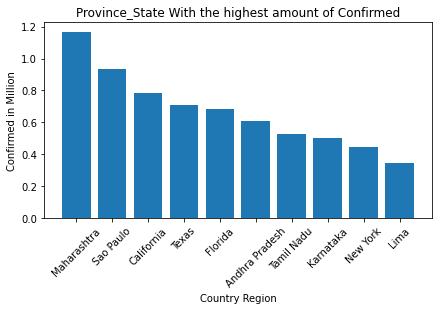

In [31]:
aggregation_functions = {'Confirmed': 'sum','Province_State':'first'}
df_new = dl.groupby(dl['Province_State']).aggregate(aggregation_functions).reindex(columns=dl.columns)
df_new.head()
df_new = df_new.sort_values(by=['Confirmed'],ascending=False).iloc[:10]
plt.bar(df_new.Province_State, df_new.Confirmed/10**6)
#sns.lineplot(data = df_new, x='Country_Region', y='Confirmed')
plt.xticks(rotation='45')
plt.tight_layout()
plt.title('Province_State With the highest amount of Confirmed')
plt.ylabel("Confirmed in Million")
plt.xlabel("Country Region")
plt.show()

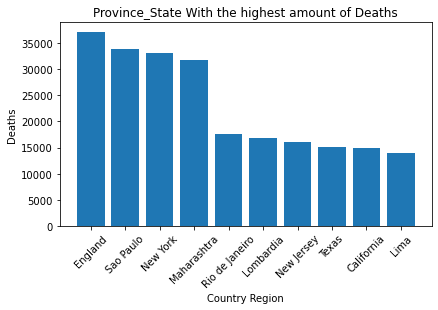

In [32]:
aggregation_functions = {'Deaths': 'sum','Province_State':'first'}
df_new = dl.groupby(dl['Province_State']).aggregate(aggregation_functions).reindex(columns=dl.columns)
df_new.head()
df_new = df_new.sort_values(by=['Deaths'],ascending=False).iloc[:10]
plt.bar(df_new.Province_State, df_new.Deaths)
plt.xticks(rotation='45')
plt.tight_layout()
plt.title('Province_State With the highest amount of Deaths')
plt.ylabel("Deaths")
plt.xlabel("Country Region")
plt.show()


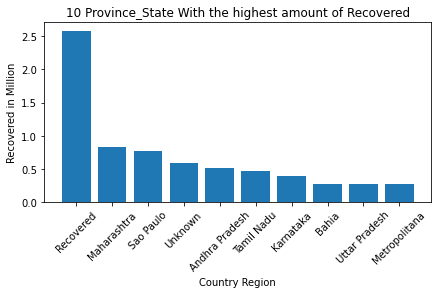

In [33]:
aggregation_functions = {'Recovered': 'sum','Province_State':'first'}
df_new = dl.groupby(dl['Province_State']).aggregate(aggregation_functions).reindex(columns=dl.columns)
df_new.head()
df_new = df_new.sort_values(by=['Recovered'],ascending=False).iloc[:10]
plt.bar(df_new.Province_State, df_new.Recovered/10**6)
plt.title('10 Province_State With the highest amount of Recovered')
plt.xticks(rotation='45')
plt.tight_layout()
plt.ylabel("Recovered in Million")
plt.xlabel("Country Region")
plt.show()

Result: we could see that "Recovered" is not a Province_State, it is a outlier here

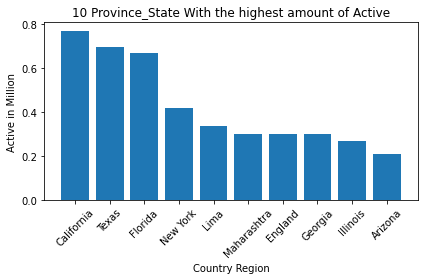

In [34]:
aggregation_functions = {'Active': 'sum','Province_State':'first'}
df_new = dl.groupby(dl['Province_State']).aggregate(aggregation_functions).reindex(columns=dl.columns)
df_new.head()
df_new = df_new.sort_values(by=['Active'],ascending=False).iloc[:10]
plt.bar(df_new.Province_State, df_new.Active/10**6)
plt.title('10 Province_State With the highest amount of Active')
plt.xticks(rotation='45')
plt.ylabel("Active in Million")
plt.xlabel("Country Region")
plt.tight_layout()
plt.show()

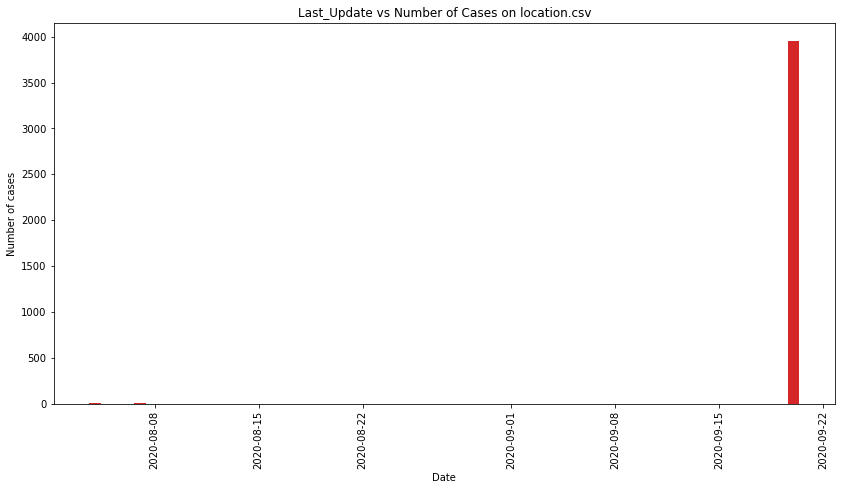

In [35]:
color = sns.color_palette()
dl['Last_Update'] = pd.to_datetime(dl["Last_Update"])
dl["date"] = dl["Last_Update"].dt.date
count = dl["date"].value_counts()
plt.figure(figsize=(14,7))
axis = plt.subplot(111)
axis.bar(count.index, count.values, color=color[3])
axis.xaxis_date()
plt.xticks(rotation='vertical')
plt.title('Last_Update vs Number of Cases on location.csv')
plt.ylabel("Number of cases")
plt.xlabel("Date")
plt.show()

The are only three different dates in the Last_Update labels: 2020-08-04, 2020-08-07, and 2020-09-20. Most of the cases are on 2020-09-20. This makes sense, as this is when we have been informed that our dataset is frozen to. So, of course most data was last updated at that point.

## Print the number of missing values for every attribute from "cases_train.csv"

In [36]:
#missing_date = df.loc[df['date_confirmation'].isnull()]
#print(len(missing_date))
print ("The number of missing data in age is", len(df.loc[df['age'].isnull()]))
print ("The number of missing data in sex is", len(df.loc[df['sex'].isnull()]))
print ("The number of missing data in province is", len(df.loc[df['province'].isnull()]))
print ("The number of missing data in country is", len(df.loc[df['country'].isnull()]))
print ("The number of missing data in latitude is", len(df.loc[df['latitude'].isnull()]))
print ("The number of missing data in longitude is", len(df.loc[df['longitude'].isnull()]))
print ("The number of missing data in date_confirmation is", len(df.loc[df['date_confirmation'].isnull()]))
print ("The number of missing data in additional_information is", len(df.loc[df['additional_information'].isnull()]))
print ("The number of missing data in source is", len(df.loc[df['source'].isnull()]))
print ("The number of missing data in outcome is", len(df.loc[df['outcome'].isnull()]))


The number of missing data in age is 209265
The number of missing data in sex is 207084
The number of missing data in province is 4106
The number of missing data in country is 18
The number of missing data in latitude is 2
The number of missing data in longitude is 2
The number of missing data in date_confirmation is 374
The number of missing data in additional_information is 344912
The number of missing data in source is 128478
The number of missing data in outcome is 0


## Print the number of missing values for every attribute from "location.csv"

In [37]:
print ("The number of missing data in Province_State is", len(dl.loc[dl['Province_State'].isnull()]))
print ("The number of missing data in Country_Region is", len(dl.loc[dl['Country_Region'].isnull()]))
print ("The number of missing data in Last_Update is", len(dl.loc[dl['Last_Update'].isnull()]))
print ("The number of missing data in latitude is", len(dl.loc[dl['Lat'].isnull()]))
print ("The number of missing data in longitude is", len(dl.loc[dl['Long_'].isnull()]))
print ("The number of missing data in Confirmed is", len(dl.loc[dl['Confirmed'].isnull()]))
print ("The number of missing data in Deaths is", len(dl.loc[dl['Deaths'].isnull()]))
print ("The number of missing data in Recovered is", len(dl.loc[dl['Recovered'].isnull()]))
print ("The number of missing data in Active is", len(dl.loc[dl['Active'].isnull()]))
print ("The number of missing data in Combined_Key is", len(dl.loc[dl['Combined_Key'].isnull()]))
print ("The number of missing data in Incidence_Rate is", len(dl.loc[dl['Incidence_Rate'].isnull()]))
print ("The number of missing data in Case-Fatality_Ratio is", len(dl.loc[dl['Case-Fatality_Ratio'].isnull()]))

The number of missing data in Province_State is 168
The number of missing data in Country_Region is 0
The number of missing data in Last_Update is 0
The number of missing data in latitude is 80
The number of missing data in longitude is 80
The number of missing data in Confirmed is 0
The number of missing data in Deaths is 0
The number of missing data in Recovered is 0
The number of missing data in Active is 2
The number of missing data in Combined_Key is 0
The number of missing data in Incidence_Rate is 80
The number of missing data in Case-Fatality_Ratio is 48
